## <span style="color:orange">Techniques: </span>
- Decision tree
- Random Forest tree
- Gaussian Naive Bayes

### <span style="color:purple">Dataset: IRIS-Flowers Prediction !</span>

### <span style="color:red">Problem: **Classification**</span>

### <span style="color:cyan">Step: 01</span>: (Import Dataset)

In [1]:
# import Libraries !

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('iris_flowers.csv')
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

 ### **Missing Values**

In [5]:
for feature in df:
    if df[feature].isnull().sum()>1:
        print(feature,":", np.round(df[feature].isnull().mean(),4),'%')
    
else:
     print("There is no Null Values")

There is no Null Values


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

 ### **Numerical Features** 

In [7]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The length of Numerical_values is :",len(numerical_features))
df[numerical_features].head()

The length of Numerical_values is : 4


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


 ### **Discrete Variable** 

In [8]:
discrete_Feature = [feature for feature in numerical_features if len(df[feature].unique())<25]

print("The Discrete feature is :",len(discrete_Feature))
discrete_Feature

The Discrete feature is : 2


['sepal_width', 'petal_width']

In [9]:
df[discrete_Feature].head()

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


 ### **Continous Variable** 

In [10]:
continous_Feature = [feature for feature in numerical_features if feature not in discrete_Feature ]

print("The Continous feature is :",len(continous_Feature))
continous_Feature

The Continous feature is : 2


['sepal_length', 'petal_length']

In [11]:
df[continous_Feature].head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


  ### **Categorical feature** 

In [12]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =="O"]
print(len(categorical_feature))
categorical_feature

1


['species']

In [13]:
df[categorical_feature].head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [14]:
X = df.drop('species', axis=1)
y = df[['species']]

In [15]:
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [16]:
y.head(2)

,species
0,setosa
1,setosa


In [17]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### <span style="color:cyan">Step: 02</span>: Data Normalize

In [18]:
# transformation !
from sklearn.preprocessing import MinMaxScaler

feature = X.columns
scaling = MinMaxScaler()
df[feature] = scaling.fit_transform(df[feature])
X = df[feature]
X.head(3)


,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667


### <span style="color:cyan">Step: 03</span>: Data Cleaned or Organize

In [19]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
print("Before Cleaning:", df.shape)

Before Cleaning: (150, 5)


***

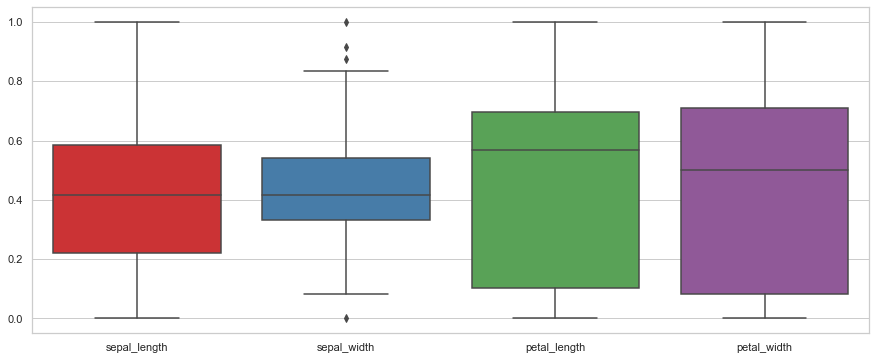

In [21]:
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            palette="Set1")
plt.show()            

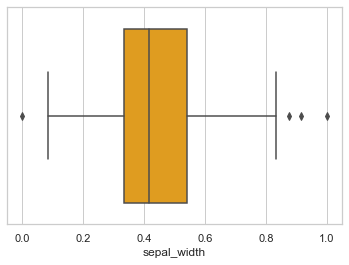

In [22]:
# sepal_width

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="sepal_width",
            color="orange")
plt.show()            

In [23]:
df = df[df['sepal_width']<0.84] 
df = df[df['sepal_width']>0.01] 


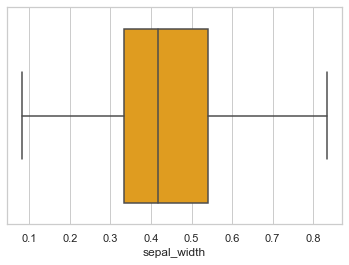

In [24]:
# sepal_width

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="sepal_width",
            color="orange")
plt.show()            

In [25]:
df.shape

(146, 5)

***

 ## **Model Building**

### <span style="color:cyan">Step: 04</span>: Splitting Dataset into (Training and Testing) Data 

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

***

### <span style="color:cyan">Step: 05</span>: Techniques !

## Decision tree !

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train, y_train)
dt_model


DecisionTreeClassifier()

### Evaluate or Test Model Accuracy

In [28]:
predicted_values = dt_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

dt_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("Decision tree:",dt_score)


Decision tree: 100.0


***

***

## Random Forest tree !

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model


C:\Users\fahad\AppData\Local\Temp\ipykernel_1796\4111477682.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestClassifier().fit(X_train, y_train)


RandomForestClassifier()

### Evaluate or Test Model Accuracy

In [30]:
predicted_values = rf_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

rf_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("Random Forest:", rf_score)


Random Forest: 96.67


***

***

## Gaussian Naive Bayes !

In [31]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB().fit(X_train, y_train)
gnb_model


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### Evaluate or Test Model Accuracy

In [32]:
predicted_values = gnb_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

gnb_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("GaussianNB:", gnb_score)


GaussianNB: 96.67


***

***

In [33]:
data={'Decesion Tree'            :[dt_score],
      'Random Forest'            :[rf_score],
      'Gaussian Naive Bayes'     :[gnb_score]
}

In [34]:
Evaluation =pd.DataFrame(data, index=['Score'])
Evaluation

,Decesion Tree,Random Forest,Gaussian Naive Bayes
Score,100.0,96.67,96.67


***

***

***